In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_rows', None)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wlsyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wlsyo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# 시드 고정
import os

SEED=42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

In [3]:
train = pd.read_csv("train.csv") # 학습용 데이터
test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
# 학습 타겟 데이터
targets=train['is_converted']
rows=train.shape[0]

# 
train=train.drop('is_converted',axis=1)
test=test.drop('id',axis=1)
test=test.drop('is_converted',axis=1)

In [5]:
permitted={
    "customer_job":{"engin":"EN", "administr":"AD", "educ":"ED", "sale":"SA", "inform":"IF", "oper":"OP", "purchas":"PA", "art":"AT", "busi":"BS", "manag":"MA","consult":"CS", "research":"RH", "dump_key":"OT"},
    
    "product_category":{"signag":"SG", "board":"BD", "multi-split":"MS", "single-split":"SS", "tv":"TV", "vrf":"VR", "dump_key":["DB","VR","SG","SS","MS","TV"]},
    
    "customer_country":{
        "india": 1,
        "brazil": 1,
        "unitedstates": 1,
        "OT": 1,
        "mexico": 1,
        "philippines": 1,
        "colombia": 1,
        "u.a.e": 1,
        "unitedkingdom": 1,
        "saudiarabia": 1,
        "chile": 1,
        "italy": 1,
        "peru": 1,
        "germany": 1,
        "poland": 1,
        "egypt": 1,
        "vietnam": 1,
        "spain": 1,
        "argentina": 1,
        "hongkong": 1,
        "australia": 1,
        "panama": 1,
        "france": 1,
        "canada": 1,
        "turkey": 1,
        "ecuador": 1,
        "indonesia": 1,
        "t\u00fcrkiye": 1,
        "singapore": 1,
        "southafrica": 1,
        "iraq": 1,
        "nigeria": 1,
        "thailand": 1,
        "hungary": 1,
        "portugal": 1,
        "kenya": 1,
        "malaysia": 1,
        "bulgaria": 1,
        "costarica": 1,
        "dominicanrepublic": 1,
        "israel": 1,
        "oman": 1,
        "elsalvador": 1,
        "pakistan": 1,
        "guatemala": 1,
        "kuwait": 1,
        "bangladesh": 1,
        "qatar": 1,
        "switzerland": 1,
        "china": 1,
        "bolivia": 1,
        "honduras": 1,
        "lebanon": 1,
        "taiwan": 1,
        "netherlands": 1,
        "belgium": 1,
        "bahrain": 1,
        "venezuela": 1,
        "puertorico": 1,
        "greece": 1,
        "japan": 1,
        "afghanistan": 1,
        "algeria": 1,
        "morocco": 1,
        "romania": 1,
        "ghana": 1,
        "jordan": 1,
        "croatia": 1,
        "nicaragua": 1,
        "ireland": 1,
        "maldives": 1,
        "serbia": 1,
        "srilanka": 1,
        "uruguay": 1,
        "albania": 1,
        "jamaica": 1,
        "southkorea": 1,
        "sweden": 1,
        "anguilla": 1,
        "paraguay": 1,
        "malta": 1,
        "azerbaijan": 1,
        "russia": 1,
        "cambodia": 1,
        "mozambique": 1,
        "yemen": 1,
        "bosniaandherzegovina": 1,
        "zimbabwe": 1,
        "iran": 1,
        "slovenia": 1,
        "ethiopia": 1,
        "botswana": 1,
        "papuanewguinea": 1,
        "senegal": 1,
        "denmark": 1,
        "angola": 1,
        "uganda": 1,
        "barbados": 1,
        "laos": 1,
        "burkinafaso": 1,
        "congo": 1,
        "unitedarabemirates": 1,
        "gambia": 1,
        "myanmar": 1,
        "togo": 1,
        "suriname": 1,
        "mauritius": 1,
        "czechrepublic": 1,
        "montenegro": 1,
        "cameroon": 1,
        "sierraleone": 1,
        "ivorycoast": 1,
        "namibia": 1,
        "mali": 1,
        "bahamas": 1,
        "sudan": 1,
        "benin": 1,
        "latvia": 1,
        "tunisia": 1,
        "guyana": 1,
        "gabon": 1,
        "cyprus": 1,
        "syria": 1,
        "georgia": 1,
        "libya": 1,
        "bermuda": 1,
        "austria": 1,
        "zambia": 1,
        "fiji": 1,
        "macedonia": 1,
        "brunei": 1,
        "norway": 1,
        "caymanislands": 1,
        "kazakhstan": 1,
        "newzealand": 1
    },

    "region":{
        "LGEAG": "LA",
        "LGECZ": "EU",
        "LGEFS": "EU",
        "LGEDG": "EU",
        "LGEHS": "EU",
        "LGEMK": "EU",
        "LGEIS": "EU",
        "LGESC": "EU",
        "LGEEH": "EU",
        "LGEBN": "EU",
        "LGEWR": "EU",
        "LGEPL": "EU",
        "LGEMA": "EU",
        "LGEPT": "EU",
        "LGERO": "EU",
        "LGEES": "EU",
        "LGENO": "EU",
        "LGESW": "EU",
        "LGEUK": "EU",
        "LGEAK": "OT",
        "LGERM": "OT",
        "LGERI": "OT",
        "LGERA": "OT",
        "LGEUR": "OT",
        "LGELV": "OT",
        "LGEAS": "OT",
        "LGEEG": "OT",
        "LGELF": "OT",
        "LGESK": "OT",
        "LGEMC": "OT",
        "LGESA": "OT",
        "LGETU": "OT",
        "LGEOT": "OT",
        "LGEDF": "OT",
        "LGEGF": "OT",
        "LGEME": "OT",
        "LGEAF": "OT",
        "LGEAO": "OT",
        "LGENI": "OT",
        "LGETK": "OT",
        "LGEAT": "OT",
        "LGESJ": "OT",
        "LGEEF": "OT",
        "LGEYK": "OT",
        "LGEIR": "OT",
        "LGEEB": "OT",
        "LGELA": "OT",
        "LGEBT": "OT",
        "LGEAP": "AP",
        "LGEQA": "AP",
        "LGETL": "AP",
        "LGECH": "AP",
        "LGEYT": "AP",
        "LGETR": "AP",
        "LGETA": "AP",
        "LGESY": "AP",
        "LGESH": "AP",
        "LGEQH": "AP",
        "LGEQD": "AP",
        "LGEPN": "AP",
        "LGENE": "AP",
        "LGEKS": "AP",
        "LGEHZ": "AP",
        "LGEHN": "AP",
        "LGEHK": "AP",
        "LGEIL": "AP",
        "LGEPH": "AP",
        "LGEVH": "AP",
        "LGEKR": "AP",
        "LGESL": "AP",
        "LGEIN": "AP",
        "LGETH": "AP",
        "LGEML": "AP",
        "LGETT": "AP",
        "LGEJP": "AP",
        "LGECI": "NA",
        "LGERS": "NA",
        "LGEMX": "NA",
        "LGEMS": "NA",
        "LGEMM": "NA",
        "LGEMR": "NA",
        "LGEUS": "NA",
        "LGEMU": "NA",
        "LGEAI": "NA",
        "LGEBR": "LA",
        "LGECL": "LA",
        "LGEVZ": "LA",
        "LGECB": "LA",
        "LGEPS": "LA",
        "LGEPR": "LA",
        "LGESP": "LA",
        "LGEAR": "LA"
    },

    "inquiry_type":{"quotation":"QP", "purchase":"QP", "sales":"SA", "dump_key":"OT"},

    "customer_position":{"none":"NO", "manager":"MA", "founder":"FD", "director":"DR", "entry":"EN", "analyst":"AN", "partner":"PA", "dump_key":"OT"},

    "values":{
        "customer_country":"dump_value",
        "business_unit":["ID", "AS", "IT", "ETC"],
        "customer_job":["OT", "EN", "AD", "ED", "SA", "PA", "OP", "IF", "AT", "BS", "MA", "OT"],
        "inquiry_type":["QP", "SA", "OT"],
        "product_category":["OT", "SG", "VR", "MS", "SS", "TV", "OT"],
        "customer_position":["NO", "OT", "MA", "FD", "DR", "AN", "PA", "EN", "OT"],
        "response_corporate":["AP", "LA", "NA", "EU", "OT"]
    },
    "response_corporate":"dump_value",
    "business_area":"dump_value",
    "enterprise":"dump_value",
    "business_unit":"dump_value",

    "com_reg_ver_win_rate":"dumpy_value",
    "customer_type":{"endcustomer":"EC", "specifier/influencer":"SI", "channelpartner":"CP", "dump_key":"OT"},
    "expected_timeline":{"lessthan3months":"L3", "3months~6months":"36", "morethanayear":"MY", "9months~1year":"91", "6months~9months":"69", "dump_key":"OT"}
}



In [6]:
# columns
cols_by_type={}

cols_by_type['categorical']=train.columns[train.dtypes=='object'].tolist()
cols_by_type['numerical']=train.columns[train.dtypes!='object'].tolist()
#colsByType['numerical'].remove('is_converted')

print('\nnumerical columns: '+str(len(cols_by_type['numerical'])))
print('categorical columns: '+str(len(cols_by_type['categorical'])))
print('total columns: '+str(len(cols_by_type['numerical'])+len(cols_by_type['categorical'])))


numerical columns: 13
categorical columns: 15
total columns: 28


In [7]:
# delete cols
del_cols=['business_subarea', 'product_subcategory', 'product_modelname', 
          'customer_country.1']

# preserve
# preserve=pd.DataFrame()
# preserve['com_reg_ver_win_rate']=total_data['com_reg_ver_win_rate']

train_process=train.drop(del_cols,axis=1)
test_process=test.drop(del_cols,axis=1)

In [8]:
# id_strategic_ver it_strategic_ver idit_strategic_ver
ver=['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver']
train_process['strategic_ver']=np.where(train_process['idit_strategic_ver']>0,1,0)
test_process['strategic_ver']=np.where(test_process['idit_strategic_ver']>0,1,0)
train_process=train_process.drop(ver,axis=1)
test_process=test_process.drop(ver,axis=1)

In [9]:
# country columns
# region
def preprocess_region(x,permitted):
    if type(x)==type(''):
        if permitted.get(x):
            return permitted[x]
        return 'OT'
    return np.nan

def response_corporate_encoding(train_data):
    permit={}
    
    for train_label in train_data.value_counts().index:
        permit[train_label]=1
    permit['OT']=1

    return permit

def preprocess_response_corporate(x,permitted):
    if type(x)==type(''):
        if permitted.get(x):
            return x
        return 'OT'
    return np.nan


def country_encoding(permitted):
    permit={}
    for per in permitted.keys():
        permit[per]=per

    permit['OT']='OT'
    permit['dump_key']='dump_value'
    permit['türkiye']='turkey'
    
    return permit

def preprocess_customer_country(x,permitted):
    if type(x)==type(''):
        x=x.lower().replace(' ','').replace('/',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return word
        return 'OT'
    return np.nan

# region
train_process['region']=train_process['response_corporate'].apply(lambda x:preprocess_region(x,permitted=permitted['region']))
test_process['region']=test_process['response_corporate'].apply(lambda x:preprocess_region(x,permitted=permitted['region']))

# response_corporate
permitted['response_corporate']=response_corporate_encoding(train['response_corporate'])
train_process['response_corporate']=train_process['response_corporate'].apply(lambda x:preprocess_response_corporate(x,permitted=permitted['response_corporate']))
test_process['response_corporate']=test_process['response_corporate'].apply(lambda x:preprocess_response_corporate(x,permitted=permitted['response_corporate']))

# customer_country   
permitted['customer_country']=country_encoding(permitted['customer_country'])
train_process['customer_country']=train_process['customer_country'].apply(lambda x:preprocess_customer_country(x,permitted=permitted['customer_country']))
test_process['customer_country']=test_process['customer_country'].apply(lambda x:preprocess_customer_country(x,permitted=permitted['customer_country']))

In [10]:
# business_unit
train_process['business_unit']=train_process['business_unit'].replace('Solution','ETC')
train_process['business_unit']=train_process['business_unit'].replace('CM','ETC')

test_process['business_unit']=test_process['business_unit'].replace('Solution','ETC')
test_process['business_unit']=test_process['business_unit'].replace('CM','ETC')

In [11]:
# customer_type
def preprocess_customer_type(x,permitted):
    if type(x)==type(''):
        x=x.lower().replace('-','').replace(' ','')
        if permitted.get(x):
            return permitted[x]
        else:
            return 'OT'
    return x
    
train_process['customer_type']=train_process['customer_type'].apply(lambda x:preprocess_customer_type(x,permitted=permitted['customer_type']))
test_process['customer_type']=test_process['customer_type'].apply(lambda x:preprocess_customer_type(x,permitted=permitted['customer_type']))

In [12]:
# business_area
# total_data['business_area']=total_data['business_area'].replace('hospital & health care','ETC')
# total_data['business_area']=total_data['business_area'].replace('factory','ETC')
# total_data['business_area']=total_data['business_area'].replace('government department','ETC')
# total_data['business_area']=total_data['business_area'].replace('public facility','ETC')
# total_data['business_area']=total_data['business_area'].replace('transportation','ETC')
# total_data['business_area']=total_data['business_area'].replace('power plant / renewable energy','ETC')
# train_process['business_area']=train_process['business_area'].fillna('UNK')
# test_process['business_area']=test_process['business_area'].fillna('UNK')

In [13]:
# ver_cus, ver_pro
grant=['ver_cus', 'ver_pro']
train_process['grant_weight']=np.where(train_process['ver_cus']>0,1,0)
train_process['grant_weight']=np.where(train_process['ver_pro']>0,1,train_process['grant_weight'])
train_process=train_process.drop(grant,axis=1)

test_process['grant_weight']=np.where(test_process['ver_cus']>0,1,0)
test_process['grant_weight']=np.where(test_process['ver_pro']>0,1,test_process['grant_weight'])
test_process=test_process.drop(grant,axis=1)

In [14]:
# expected_timeline
def preprocess_expected_timeline(x,permitted):
    if type(x)==type(''):
        x=x.lower().replace(' ','').replace('_','')
        if permitted.get(x):
            return permitted[x]
        return 'OT'
    return x

train_process['expected_timeline']=train_process['expected_timeline'].apply(lambda x:preprocess_expected_timeline(x,permitted=permitted['expected_timeline']))
test_process['expected_timeline']=test_process['expected_timeline'].apply(lambda x:preprocess_expected_timeline(x,permitted=permitted['expected_timeline']))

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # lead_desc_length, historical_existing_cnt
# numerical=['lead_desc_length','historical_existing_cnt']
# #total_data[numerical]=scaler.fit_transform(total_data[numerical])
# train_process[numerical]=np.log1p(train_process[numerical])
# test_process[numerical]=np.log1p(test_process[numerical])

# lead_desc_length, historical_existing_cnt
from sklearn.preprocessing import RobustScaler

numerical=['lead_desc_length','historical_existing_cnt','com_reg_ver_win_rate','ver_win_rate_x','ver_win_ratio_per_bu']
scaler=RobustScaler()
scaler.fit(train_process[numerical])
train_process[numerical]=scaler.transform(train_process[numerical])
test_process[numerical]=scaler.transform(test_process[numerical])

In [16]:
# inquiry_type
def preprocess_inquiry_type(x,permitted):
    if type(x)==type(''):
        x=x.lower().replace('_',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

train_process['inquiry_type']=train_process['inquiry_type'].apply(lambda x:preprocess_inquiry_type(x,permitted=permitted['inquiry_type']))
test_process['inquiry_type']=test_process['inquiry_type'].apply(lambda x:preprocess_inquiry_type(x,permitted=permitted['inquiry_type']))

In [17]:
# customer_job
def preprocess_customer_job(x,permitted):
    if type(x)==type(''):
        porter=PorterStemmer()
        tokens=word_tokenize(x)
        stems=[porter.stem(token) for token in tokens]
        for stem in stems:
            if permitted.get(stem):
                return permitted[stem]
        return 'OT'
    return np.nan

train_process['customer_job']=train_process['customer_job'].apply(lambda x:preprocess_customer_job(x,permitted=permitted['customer_job']))
test_process['customer_job']=test_process['customer_job'].apply(lambda x:preprocess_customer_job(x,permitted=permitted['customer_job']))

In [18]:
# product_category
def preprocess_product_category(x,permitted):
    if type(x)==type(''):
        porter=PorterStemmer()
        tokens=word_tokenize(x)
        stems=[porter.stem(token) for token in tokens]

        prefer={}
        for pf in permitted['dump_key']:
            prefer[pf]=0
        
        for stem in stems:
            if permitted.get(stem):
                prefer[permitted[stem]]=1

        for pf in permitted['dump_key']:
            if prefer[pf]>0:
                return pf
        return 'OT'
    return np.nan

train_process['product_category']=train_process['product_category'].apply(lambda x:preprocess_product_category(x,permitted=permitted['product_category']))
test_process['product_category']=test_process['product_category'].apply(lambda x:preprocess_product_category(x,permitted=permitted['product_category']))

In [19]:
# customer_poisition
def preprocess_customer_position(x,permitted):
    if type(x)==type(''):
        x=x.lower().replace('-',' ').replace('/',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

train_process['customer_position']=train_process['customer_position'].apply(lambda x:preprocess_customer_position(x,permitted=permitted['customer_position']))
test_process['customer_position']=test_process['customer_position'].apply(lambda x:preprocess_customer_position(x,permitted=permitted['customer_position']))

In [20]:
# one hot encoding columns
origin_data=train_process.drop('com_reg_ver_win_rate',axis=1)
origin_columns=origin_data.columns.to_list()
object_columns=origin_data.columns.to_list()
object_columns.remove('bant_submit')
object_columns.remove('historical_existing_cnt')
object_columns.remove('lead_desc_length')
object_columns.remove('strategic_ver')
object_columns.remove('grant_weight')
object_columns.remove('customer_idx')
object_columns.remove('lead_owner')
object_columns.remove('ver_win_rate_x')
object_columns.remove('ver_win_ratio_per_bu')
for col in object_columns:
    permitted['values'][col]=train_process[col].value_counts().index
permitted['values']

{'customer_country': Index(['india', 'brazil', 'unitedstates', 'mexico', 'OT', 'philippines',
        'colombia', 'u.a.e', 'unitedkingdom', 'saudiarabia',
        ...
        'fiji', 'caymanislands', 'laos', 'benin', 'sierraleone', 'congo',
        'unitedarabemirates', 'gambia', 'mali', 'ivorycoast'],
       dtype='object', length=134),
 'business_unit': Index(['ID', 'AS', 'IT', 'ETC'], dtype='object'),
 'customer_job': Index(['OT', 'EN', 'AD', 'ED', 'SA', 'PA', 'OP', 'IF', 'AT', 'BS', 'MA', 'CS',
        'RH'],
       dtype='object'),
 'inquiry_type': Index(['QP', 'SA', 'OT'], dtype='object'),
 'product_category': Index(['OT', 'SG', 'VR', 'MS', 'SS', 'TV'], dtype='object'),
 'customer_position': Index(['NO', 'OT', 'MA', 'FD', 'DR', 'AN', 'PA', 'EN'], dtype='object'),
 'response_corporate': Index(['LGEIL', 'LGESP', 'LGEUS', 'LGEMS', 'LGEPH', 'LGEGF', 'LGECB', 'LGEUK',
        'LGESJ', 'LGECL', 'LGEPS', 'LGEIS', 'LGEPR', 'LGEDG', 'LGEPL', 'LGEEG',
        'LGEVH', 'LGEES', 'LGETK', 'LG

In [21]:
train_process.to_csv('./data_confirm/train00_nan.csv')
test_process.to_csv('./data_confirm/test00_nan.csv')

In [22]:
# encoder
class Encoder():
    def __init__(self):
        self.classes=[]

    def fit(self,data):
        for value in data.value_counts().index:
            self.classes.append(value)

    def transform(self,data):
        result=data.copy(deep=True)
        for i,value in enumerate(self.classes):
            result=result.replace(value,i)
        return result
    
    def inverse_transform(self,data):
        result=data.copy(deep=True)
        for i in range(0,len(self.classes)):
            result=result.replace(i,self.classes[i])
        return result

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer=IterativeImputer(estimator=RandomForestRegressor(random_state=SEED),initial_strategy='most_frequent',max_iter=10,random_state=SEED,skip_complete=False,verbose=1)

# encoder
encoders={}
for object_column in object_columns:
    encoders[object_column]=Encoder()
    encoders[object_column].fit(train_process[object_column])


def order_encoding(target_data,object_columns,encoders):
    result=pd.DataFrame()
    for col in target_data.columns:
        if col in object_columns:
            result[col]=encoders[col].transform(target_data[col])
        else:
            result[col]=target_data[col]

    return result

def order_decoding(target_data,object_columns,encoders):
    result=pd.DataFrame()
    for col in target_data.columns:
        if col in object_columns:
            result[col]=target_data[col].apply(lambda x:round(x)).astype(int)
            result[col]=encoders[col].inverse_transform(result[col])
        else:
            result[col]=target_data[col]
    return result

# train data
train_dummy=order_encoding(train_process,object_columns,encoders)
imputer.fit(train_dummy)  
train_dummy_imputed=pd.DataFrame(data=imputer.transform(train_dummy),columns=train_process.columns)
train_imputed=order_decoding(train_dummy_imputed,object_columns,encoders)

# test data
test_dummy=order_encoding(test_process,object_columns,encoders)
test_dummy_imputed=pd.DataFrame(data=imputer.transform(test_dummy),columns=test_process.columns)
test_imputed=order_decoding(test_dummy_imputed,object_columns,encoders)


[IterativeImputer] Completing matrix with shape (59299, 22)
[IterativeImputer] Change: 79.11611111111111, scaled tolerance: 47.466 
[IterativeImputer] Change: 75.95555555555556, scaled tolerance: 47.466 
[IterativeImputer] Change: 69.47500000000001, scaled tolerance: 47.466 
[IterativeImputer] Change: 30.346728960300037, scaled tolerance: 47.466 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (59299, 22)
[IterativeImputer] Completing matrix with shape (5271, 22)


In [24]:
train_imputed.to_csv('./data_confirm/train_mice_check.csv')

In [25]:
# data kfold
from sklearn.model_selection import KFold

train_datas=[]
train_imputed['is_converted']=targets
train_data_false=train_imputed[train_imputed['is_converted']==0]
train_data_true=train_imputed[train_imputed['is_converted']==1]

# kfold
K=11
dkf=KFold(n_splits=K,shuffle=True,random_state=SEED)
#preserves=[pd.DataFrame() for x in range(0,K+1)]
for i,(_,index) in enumerate(dkf.split(train_data_false)):
    print(f'-{i+1} fold data-')
    data_false=train_data_false.iloc[index]
    
    full_data=pd.concat([data_false,train_data_true],ignore_index=True)
    full_data=full_data.sample(frac=1,random_state=SEED)
    X_data=full_data.drop('is_converted',axis=1)
    y_data=full_data['is_converted']
    
    # preserve
    # preserves[i]['com_reg_ver_win_rate']=X_data['com_reg_ver_win_rate']
    # X_data=X_data.drop('com_reg_ver_win_rate',axis=1)
    # preserves[i]['customer_idx']=X_data['customer_idx']
    # X_data['customer_idx']=np.log1p(X_data['customer_idx'])
    # preserves[i]['lead_owner']=X_data['lead_owner']
    # X_data['lead_owner']=np.log1p(X_data['lead_owner'])
    

    print(f'X data shape: {X_data.shape}')
    print(f'y data shape: {y_data.shape}')
    train_datas.append((X_data,y_data))

# preserve
# preserves[K]['com_reg_ver_win_rate']=test_process['com_reg_ver_win_rate']
# test_data=test_process.drop('com_reg_ver_win_rate',axis=1)
# preserves[K]['customer_idx']=X_data['customer_idx']
# test_data['customer_idx']=np.log1p(test_data['customer_idx'])
# preserves[K]['lead_owner']=X_data['lead_owner']
# test_data['lead_owner']=np.log1p(test_data['lead_owner'])
test_data=test_imputed
print(f'test data shape: {test_data.shape}')

-1 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-2 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-3 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-4 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-5 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-6 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-7 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-8 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-9 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-10 fold data-
X data shape: (9800, 22)
y data shape: (9800,)
-11 fold data-
X data shape: (9799, 22)
y data shape: (9799,)
test data shape: (5271, 22)


In [26]:
# process data type
for (train_data,target) in train_datas:
    train_data['customer_idx']=train_data['customer_idx'].astype(str)
    train_data['lead_owner']=train_data['lead_owner'].astype(str)
    train_data['strategic_ver']=train_data['strategic_ver'].astype(int)
    train_data['grant_weight']=train_data['grant_weight'].astype(int)
    target=target.apply(lambda x:1 if x else 0)

test_data['customer_idx']=test_data['customer_idx'].astype(str)
test_data['lead_owner']=test_data['lead_owner'].astype(str)
test_data['strategic_ver']=test_data['strategic_ver'].astype(int)
test_data['grant_weight']=test_data['grant_weight'].astype(int)

In [27]:
# # over sampling
# from imblearn.over_sampling import ADASYN

# def decoding(origin_data,data_hot,object_columns):
#     result=pd.DataFrame()
#     for col in origin_data.columns:
#         if col in object_columns:
#             target_columns=[]
#             for target_column in origin_data[col].value_counts().index:
#                 target_columns.append(col+'_'+target_column)
#             result[col]=data_hot[target_columns].idxmax(axis=1).apply(lambda x:x.split('_')[-1])
#         else:
#             result[col]=data_hot[col]
    
#     return result

# # object_columns.append('customer_idx')
# # object_columns.append('lead_owner')
# over_sampled_data=[]
# for i,(train_data,target) in enumerate(train_datas):
#     print(f'[{i+1}] fold data over sampling')
#     target=target.apply(lambda x:1 if x else 0)
#     dummy=pd.get_dummies(train_data)
#     over_sampler=ADASYN(random_state=SEED)
#     over_sampled_X,over_sampled_y=over_sampler.fit_resample(dummy,target)
#     over_sampled_data.append((decoding(train_data,over_sampled_X,object_columns),over_sampled_y))

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics         import mean_squared_error

In [29]:
# 모델 성능 테스트
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))
    return F1

In [56]:
class KMODEL:
    def __init__(self,dataset_K,train_K=5,random_state=SEED):
        self.k_data=dataset_K
        self.k_fold=train_K
        self.models=[[] for i in range(0,self.k_data-1)]
        self.scores=[[] for i in range(0,self.k_data-1)]
        self.thresholds=[[] for i in range(0,self.k_data-1)]
        self.cv_scores=[]
        self.final_threshold=0
        self.seed=random_state

    def modeling_kfold(self,iters,n_estimators,max_depth,learning_rate,cat_features,train_data,targets_data,noise,core):
        # k-fold
        kf=StratifiedKFold(n_splits=self.k_fold,shuffle=True,random_state=self.seed)

        for i,(train_index,val_index) in enumerate(kf.split(train_data,targets_data)):
            print(f'-[{iters+1}-{i+1}] fold-')
            # noise
            targets_noised=(targets_data+noise).apply(lambda x:self.value_scale(x))

            X_train,X_val=train_data.iloc[train_index],train_data.iloc[val_index]
            y_train,y_val=targets_noised.iloc[train_index],targets_noised.iloc[val_index]

            # logloss
            #classifier=CatBoostClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, eval_metric='F1', random_state=SEED, bootstrap_type ='Bernoulli',task_type=core) # default:logloss
            
            # randomforst
            #classifier=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=SEED)

            # regressor
            regressor=CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, eval_metric='RMSE',random_state=self.seed, bootstrap_type ='Bernoulli',task_type=core)

            model=regressor.fit(X_train, y_train, eval_set=(X_val,y_val),verbose=100, early_stopping_rounds=100,cat_features=cat_features,use_best_model=True)
            #model=classifier.fit(X_train,y_train)
            # model=regressor.fit(X_train, y_train, eval_set=(X_val,y_val),verbose=100, early_stopping_rounds=100,cat_features=cat_features)
            
            
            # pred=model.predict(X_val,prediction_type='RawFormulaVal')  # focal loss
            # coordinates=np.linspace(pred.min(),pred.max(),100)   # focal loss
            # pred=model.predict_proba(X_val)[:,1]              # classifer
            pred=model.predict(X_val)                           # regressor               
            coordinates = np.linspace(0, 1, 100)
            y_val=y_val>0.5

            best_score=0
            best_coordinate=0
            for coordinate in coordinates:
                pred_value=pred>coordinate
                score=f1_score(y_val,pred_value)
                if best_score<score:
                    best_score=score
                    best_coordinate=coordinate
            
            pred=(pred>best_coordinate)
            self.scores[iters].append(get_clf_eval(y_val,pred))
            self.thresholds[iters].append(best_coordinate)
            # scores.append(np.sqrt(mean_squared_error(y_val,pred)))
            self.models[iters].append(model)
        
        self.cv_scores.append(np.mean(self.scores[iters]))
        print(f'[{iters+1}] F1 scores mean: {self.cv_scores[iters]}')

    def modeling_kdata(self,n_estimators,max_depth,learning_rate,cat_features,train_datas,core='CPU'):
        noise_size=0
        for _,target in train_datas:
            noise_size+=target.shape[0]
        noises=[round(random.uniform(-0.1,0.1),5) for i in range(noise_size)]

        checksum=0
        for iter,(train_data,target) in enumerate(train_datas):
            noise=noises[checksum:checksum+target.shape[0]]
            if iter==(self.k_data-1):
                self.define_threshold(train_data,target)
            else:
                self.modeling_kfold(iter,n_estimators,max_depth,learning_rate,cat_features,train_data,target,noise,core=core)
                checksum+=target.shape[0]
            
        #self.final_threshold=np.mean(self.thresholds)
        print(f'-----Total F1 scores mean: {np.mean(self.cv_scores)}-----')
        


    def predict(self,test_data):
        test_pred=pd.Series([0 for x in range(len(test_data))], index=test_data.index)
        
        # version1
        # for models,thresholds in zip(self.models,self.thresholds):
        #     for model,threshold in zip(models,thresholds):
        #         pred=model.predict(test_data)
        #         test_pred+=pred>threshold
        # test_pred=test_pred/((self.k_data)*(self.k_fold))
        # test_pred=test_pred.apply(lambda x:1 if x>0.5 else 0)
        
        # version2
        for models in self.models:
            for model in models:
                pred=model.predict(test_data)
                test_pred+=pred
        test_pred=test_pred/((self.k_data-1)*(self.k_fold))
        test_pred=test_pred>self.final_threshold
        
        return test_pred
    
    def value_scale(self,x):
        if x<0:
            return 0
        elif x>1:
            return 1
        
        return x
    
    def define_threshold(self,dataset,target_data):
        print('---------define threshold----------')
        val_pred=pd.Series([0 for x in range(len(target_data))], index=target_data.index)
        for models in self.models:
            for model in models:
                pred=model.predict(dataset)
                val_pred+=pred
        val_pred=val_pred/((self.k_data-1)*(self.k_fold))
        
        coordinates = np.linspace(0, 1, 100)
        best_score=0
        best_coordinate=0
        for coordinate in coordinates:
            pred_value=val_pred>coordinate
            score=f1_score(target_data,pred_value)
            if best_score<score:
                best_score=score
                best_coordinate=coordinate
        
        val_pred=(val_pred>best_coordinate)
        get_clf_eval(target_data,val_pred)
        self.final_threshold=best_coordinate

In [57]:
cat_features=train_datas[0][0].columns.to_list()
cat_features.remove('bant_submit')
cat_features.remove('lead_desc_length')
cat_features.remove('historical_existing_cnt')
cat_features.remove('com_reg_ver_win_rate')
cat_features.remove('ver_win_rate_x')
cat_features.remove('ver_win_ratio_per_bu')
cat_features

['customer_country',
 'business_unit',
 'customer_idx',
 'customer_type',
 'enterprise',
 'customer_job',
 'inquiry_type',
 'product_category',
 'customer_position',
 'response_corporate',
 'expected_timeline',
 'business_area',
 'lead_owner',
 'strategic_ver',
 'region',
 'grant_weight']

In [62]:
kmodel=KMODEL(dataset_K=11)
kmodel.modeling_kdata(n_estimators=1000,max_depth=8,learning_rate=0.05,cat_features=cat_features,train_datas=train_datas)


-[1-1] fold-
0:	learn: 0.4644069	test: 0.4629093	best: 0.4629093 (0)	total: 73.9ms	remaining: 1m 13s
100:	learn: 0.2322249	test: 0.2326296	best: 0.2326296 (100)	total: 7.15s	remaining: 1m 3s
200:	learn: 0.2152571	test: 0.2282702	best: 0.2282702 (200)	total: 13.5s	remaining: 53.7s
300:	learn: 0.2023532	test: 0.2261097	best: 0.2260161 (297)	total: 20.1s	remaining: 46.7s
400:	learn: 0.1913224	test: 0.2233332	best: 0.2233332 (400)	total: 26.5s	remaining: 39.6s
500:	learn: 0.1807744	test: 0.2220682	best: 0.2220682 (500)	total: 33s	remaining: 32.9s
600:	learn: 0.1715908	test: 0.2211777	best: 0.2211674 (590)	total: 39.7s	remaining: 26.4s
700:	learn: 0.1612995	test: 0.2201635	best: 0.2201025 (697)	total: 46.7s	remaining: 19.9s
800:	learn: 0.1527728	test: 0.2197834	best: 0.2197443 (798)	total: 53.6s	remaining: 13.3s
900:	learn: 0.1452648	test: 0.2190476	best: 0.2190476 (900)	total: 1m	remaining: 6.63s
999:	learn: 0.1389359	test: 0.2182244	best: 0.2181889 (994)	total: 1m 6s	remaining: 0us

bestT

In [64]:
pred=kmodel.predict(test_data)
pred.value_counts()

False    4433
True      838
dtype: int64

In [63]:
kmodel.final_threshold

0.7373737373737375

In [35]:
test_pred=pd.Series([0 for x in range(len(test_data))], index=test_data.index)
for models in kmodel.models:
    for model in models:
        pred=model.predict(test_data)
        test_pred+=pred
test_pred=test_pred/55
test_pred=test_pred>0.45
test_pred.value_counts()

False    3612
True     1659
dtype: int64

In [36]:
feat_imp=kmodel.models[0][0].get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,customer_idx,28.137926
1,lead_owner,25.110886
2,inquiry_type,4.131356
3,business_area,3.834013
4,lead_desc_length,3.431069
5,response_corporate,3.418307
6,product_category,3.403194
7,region,3.338683
8,customer_type,3.331878
9,customer_position,2.867676


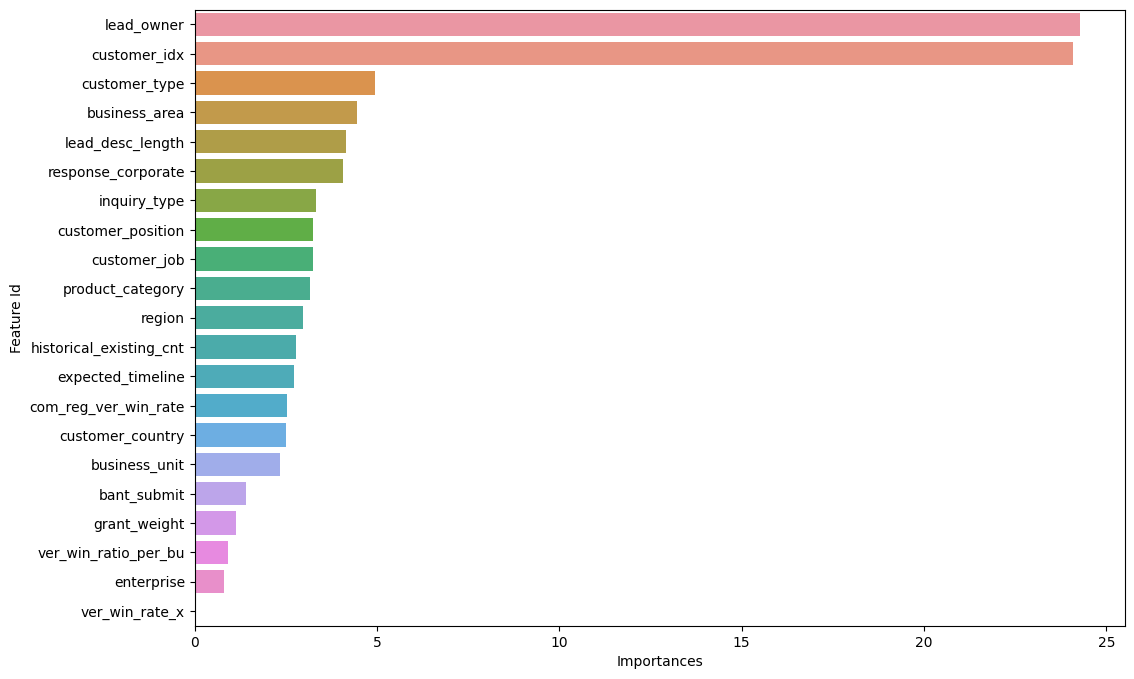

In [61]:
# Plotting top 20 features' importance
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.figure(figsize = (12,8))
sns.barplot(x=feat_imp['Importances'][:20],y=feat_imp['Feature Id'][:21], orient = 'h')
plt.show()